In [1]:
from datetime import datetime, timezone

import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

from github_analysis.github.client.users import PullRequestStates
from github_analysis.github.service import GitHubService

PAGINATION_STEP_AMOUNT = 100
FILTER_STATES: list[PullRequestStates] = ["MERGED"]
NOW = datetime.now(tz=timezone.utc)
ONE_YEAR_AGO = NOW - relativedelta(years=1)
AGGREGATION_TIME = ONE_YEAR_AGO
USERNAME = "kentcdodds"

github_service = GitHubService()

(
    pull_request_reviews,
    merged_pull_requests,
) = await github_service.get_users_reviews_and_pull_requests(
    username=USERNAME,
    pagination_step_amount=PAGINATION_STEP_AMOUNT,
    from_date=AGGREGATION_TIME,
    pull_request_states=FILTER_STATES,
)

In [2]:
from github_analysis.data_frame_processing import (
    group_pull_requests_by_repositories,
    pull_requests_as_data_frame,
)

merged_pull_requests_data_frame = pull_requests_as_data_frame(
    pull_requests=merged_pull_requests
)
grouped_merged_pull_requests = group_pull_requests_by_repositories(
    pull_requests=merged_pull_requests_data_frame
)
grouped_merged_pull_requests

repository_name,amount_of_pull_requests
str,u32
"""skillrecordings/products""",20
"""epicweb-dev/pixel-perfect-tail…",5
"""epicweb-dev/testing-fundamenta…",5
"""epicweb-dev/epic-stack""",3
"""inngest/website""",2
…,…
"""epicweb-dev/react-hooks""",1
"""kentcdodds/kentcdodds.com""",1
"""mjackson/multipart-parser""",1


In [3]:
from github_analysis.data_frame_processing import pull_request_reviews_as_data_frame

pull_request_reviews_data_frame = pull_request_reviews_as_data_frame(
    pull_request_reviews=pull_request_reviews
)

In [4]:
from github_analysis.data_frame_processing import (
    group_pull_request_reviews_by_repositories,
)

grouped_pull_request_reviews = group_pull_request_reviews_by_repositories(
    pull_request_reviews=pull_request_reviews_data_frame
)
grouped_pull_request_reviews

repository_name,amount_of_reviews
str,u32
"""epicweb-dev/epic-stack""",96
"""epicweb-dev/full-stack-foundat…",38
"""epicweb-dev/data-modeling""",33
"""epicweb-dev/web-auth""",30
"""kentcdodds/kentcdodds.com""",29
…,…
"""kentcdodds/the-webs-next-trans…",1
"""kentcdodds/advanced-react-patt…",1
"""epicweb-dev/pixel-perfect-tail…",1


In [5]:
from github_analysis.data_frame_processing import process_total_stats

process_total_stats(
    grouped_pull_request_reviews=grouped_pull_request_reviews,
    grouped_merged_pull_requests=grouped_merged_pull_requests,
)

stat,totals
str,i64
"""pull_request_reviews""",354
"""pull_requests""",49


In [6]:
from github_analysis.data_frame_processing import reviews_given_to_user

reviews_given_to_user(pull_request_reviews=pull_request_reviews_data_frame)

pull_request_author,pull_request_reviews_given
str,u32
"""moelzanaty3""",14
"""HelpMe-Pls""",13
"""Creeland""",11
"""justin48""",10
"""sevignator""",10
…,…
"""JLarky""",1
"""Insidiae""",1
"""lamson-dev""",1


In [7]:
from github_analysis.data_frame_processing import reviews_given_by_users

reviews_given_by_users(pull_requests=merged_pull_requests_data_frame)

reviewer,reviews_given
str,u32
"""vojtaholik""",12
"""joelhooks""",9
"""kettanaito""",6
"""simonswiss""",5
"""rickhanlonii""",1
…,…
"""MichaelDeBoey""",1
"""patak-dev""",1
"""machour""",1


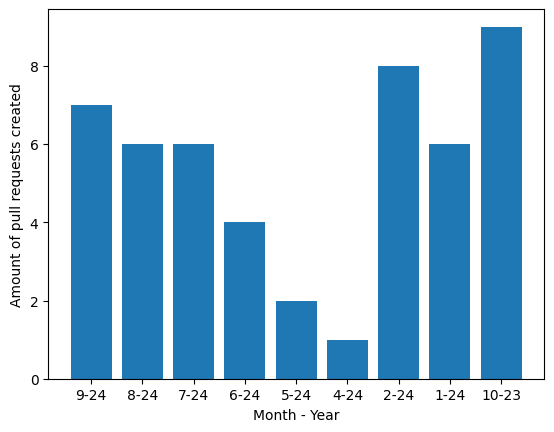

In [8]:
from github_analysis.data_frame_processing import pull_requests_aggregated_by_month

pull_requests_aggregated_by_month_result = pull_requests_aggregated_by_month(
    pull_requests=merged_pull_requests_data_frame
)

(
    pull_requests_aggregated_by_month_figure,
    pull_requests_aggregated_by_month_figure_axes,
) = plt.subplots()
pull_requests_aggregated_by_month_figure_axes.bar(
    x=pull_requests_aggregated_by_month_result["created_at_month"],
    height=pull_requests_aggregated_by_month_result["amount_pull_requests"],
)
pull_requests_aggregated_by_month_figure_axes.set_ylabel(
    "Amount of pull requests created"
)
pull_requests_aggregated_by_month_figure_axes.set_xlabel("Month - Year")
plt.show()